<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C7/C7.html"><img src="../data/C7_nav.png" width="100"  style="float:right;" alt="C7"></a>
<h1>Audio Identification</h1> 
</div>

<br/>

<p>
Following Section 7.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we discuss in this notebook the task of audio identification. In particular, we present the main ideas of a popular fingerprinting system based on spectral peaks, which was original introduced by Wang (and used in commercial systems such as Shazam).
    
<ul>
<li><span style="color:black">
Avery Wang: <strong><a href="https://www.ee.columbia.edu/~dpwe/papers/Wang03-shazam.pdf">An Industrial Strength Audio Search Algorithm.</a></strong> Proceedings of the International Society for Music Information Retrieval Conference (ISMIR), Baltimore, Maryland, USA, pp. 7&ndash;13, 2003. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_Wang03_Shazam_ISMIR.txt"> Bibtex </a>
</span></li>

<li><span style="color:black">
Peter Grosche, Meinard Müller, and Joan Serrà: <strong><a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2012_GroscheMuellerSerra_ContentBasedRetrieval_DagstuhlFU.pdf">Audio Content-Based Music Retrieval.</a></strong> In Meinard Müller and Masataka Goto and Markus Schedl (ed.): Multimodal Music Processing, Schloss Dagstuhl—Leibniz-Zentrum für Informatik, 3: 157–174, 2012.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_GroscheMS12_ContentBasedMusicRetrieval_DagstuhlFU.txt"> Bibtex </a>
</span></li>
</ul>    
</p> 


## Introduction

Let us assume you hear a song in a restaurant, in a shopping mall, or in a car, and you want to learn more about it. For example, you want to know the song's title or the name of the performer or the artist. Recent music discovery services help users in such situations by identifying the audio recording and delivering suitable content information. A typical scenario is that a user, also called the **client**, records a short audio fragment of the unknown song using a smartphone. The audio fragment is then converted into so-called **audio fingerprints**, which are compact and descriptive audio features. These fingerprints are transmitted to the identification service, also called the **server**. The server hosts various data resources including a fingerprint database that covers all music recordings to be identified, as well as a metadata database that contains content information linked to these recordings. The server receives the query fingerprints sent by the client and compares them with the fingerprints contained in the database. This step is typically realized by an efficient database look-up supported by suitable index structures. In the case of a successful identification, the server retrieves the content information linked to the identified fingerprints and sends back the desired metadata to the client. The following figure presents a schematic overview of the underlying **client&ndash;server model** of the described metadata delivery service. 

<img src="../data/C7/FMP_C7_F02.png" width="350px" align="middle" alt="FMP_C7_F02.png">

Within the area of content-based music retrieval, the task of audio identification has received a lot of attention in both academic research and industry. Audio identification techniques have now been integrated into many commercial applications such as broadcast and copyright monitoring, or added-value services for delivering metadata and other content information.

## General Requirements

Real-world music recognition systems need to be robust and computationally efficient, which leads to a number of technical challenges to be solved. In particular, the audio fingerprints used in such systems need to fulfill certain requirements including high specificity, robustness, compactness, and scalability.

* **Specificity:** Audio fingerprints should possess a high specificity so that even an audio fragment of only a few seconds suffices to reliably identify the corresponding recording and to distinguish it from millions of others.
* **Robustness:** For a reliable identification, fingerprints need to be robust against background noise and signal distortions such as lossy compression, pitch shifting, time scaling, equalization, or dynamics compression.
* **Compactness:** Audio fingerprints should be small-sized so that they can be transmitted over channels with limited bandwidth and can be easily stored and indexed on the database side.
* **Scalability:** In order to scale to millions of recordings, the computation of audio fingerprints should be simple and efficient&mdash;a requirement that is also needed when computing the fingerprints on mobile devices with limited processing power. 

Improving a certain requirement often implies losing performance in some other, and one has to face a delicate trade-off between contradicting principles. For example, boosting the robustness typically leads to an increase of wrong identifications (false positives), thus deteriorating the accuracy of the identification system. Similarly, even though beneficial for computational and compactness reasons, an excessive reduction of the fingerprint size negatively affects the discrimination capability. Conversely, fingerprints of high specificity and robustness may not be usable in practice if their computation requires extensive processing power. We close this section by giving some audio examples (a section of the Beatles song "Act Naturally") for signal distortions a fingerprinting system needs to deal with.

<table style="border:none;text-align:left;">
   <tr>
      <th style="border:none;text-align:left;">Short name</th> 
      <th style="border:none;text-align:left;">Type of distortion</th>
      <th style="border:none;text-align:left;">Audio</th>
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Original</td> 
      <td style="border:none;text-align:left;">Original song</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 300px;" src="../data/C7/FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Talking</td>  
      <td style="border:none;text-align:left;">Superposition with other sources <br>(e.g., people talking in background)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 300px;" src="../data/C7/FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_Talking.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Noise</td>  
      <td style="border:none;text-align:left;">Superposition with Gaussian noise</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 300px;" src="../data/C7/FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_NoiseSNR-9.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Coding</td>  
      <td style="border:none;text-align:left;">Strong coding artifacts</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 300px;" src="../data/C7/FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_16kbits.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>

   <tr>
      <td style="border:none;text-align:left;">Faster</td> 
      <td style="border:none;text-align:left;">Time scale modification (faster)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 300px;" src="../data/C7/FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_Faster.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>

   <tr>
      <td style="border:none;text-align:left;">Higher</td>  
      <td style="border:none;text-align:left;">Pitch shifting (higher)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 300px;" src="../data/C7/FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_higher.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
</table>

## Audio Fingerprints Based on Spectral Peaks

We now describe audio fingerprints that are based on the concept of spectral peaks. Being characteristic points in the time&ndash;frequency plane, such peaks often remain unchanged even in the presence of noise and additional sound sources. Peak-based fingerprints, which were introduced by Avery Wang, are now successfully used in commercial audio identification systems.

Given an audio signal in the form of a sampled waveform, the first step of deriving the fingerprints consists in computing an STFT $\mathcal{X}$ (see Section 3.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>). Recall that $\mathcal{X}(n,k)$ denotes the $k^{\mathrm{th}}$ Fourier coefficient for the $n^{\mathrm{th}}$ time frame, where $k\in[0:K]$ and $n\in\mathbb{Z}$. In the following, an element $k\in[0:K]$ is also referred to as a **frequency stamp** and an element $n\in\mathbb{Z}$ as a **time stamp**. Hence, the coordinates of a Fourier coefficient $\mathcal{X}(n,k)$ are specified by a time&ndash;frequency point $(n,k)\in\mathbb{Z}\times[0:K]$ consisting of a time stamp $n$ and a frequency stamp $k$. In the second step of the fingerprint computation, the STFT representation of the signal is reduced to a sparse set of time&ndash;frequency points. To this end, one uses a peak-picking strategy that identifies time&ndash;frequency points having a higher magnitude than all their neighbors within a region around the respective points. More precisely, let $\tau\in\mathbb{N}$ and $\kappa\in\mathbb{N}$ be parameters that determine the size of the **neighborhood** in the time and frequency direction, respectively. Then a point $(n_0,k_0)$ is selected as a peak if 

\begin{equation}
    |X(n_0,k_0)| \geq  |X(n,k)|
\end{equation}

for all $(n,k) \in \big(\left[n_0-\tau:n_0+\tau\right] \times 
\left[k_0-\kappa:k_0+\kappa\right]\big)$.

These definitions are illustrated by the following figure, which shows a spectrogram and one extracted peak with its local neighborhood. Note that increasing the size of the neighborhood makes it harder for a point to be selected. Thus, the parameters $\tau$ and $\kappa$ can be used to adjust the density of the selected peaks and to yield a reasonably uniform coverage
of the time&ndash;frequency plane.

<img src="../data/C7/FMP_C7_F03a.png" width="200px" align="middle" alt="FMP_C7_F03a.png">

## Constellation Map

The peak selection step reduces a complicated spectrogram representation of the signal to a sparse set of coordinates. Notice that the magnitudes of the peaks are no longer used&mdash;only the time and frequency stamps of the peaks are considered, which introduces
a high degree of robustness. In the following, the representation consisting of all peak coordinates is also referred to as a **constellation map**. This name is inspired by the observation that the spectral peak patterns look like groups of stars that form patterns on the celestial sphere. 

<!--The following figures shows a spectrogram representation with extracted peak fingerprints as well as the resulting constellation map.-->
<!--Illustration of the peak-based audio fingerprints using a recording of "Day Tripper" by The Beatles as an example.-->
<!--<img src="../data/C7/FMP_C7_F04.png" width="300px" align="middle" alt="FMP_C7_F04.png">-->

In the following code cell, we provide a naive implementation for extracting a constellation map for given **neighborhood parameters** $\tau$ and $\kappa$. In this implementation, we iteratively loop through all time-frequency points and check if the neighborhood condition (specified by $\kappa$ and $\tau$) is fulfilled. The figures shows a spectrogram representation along with a constellation map (the extracted peak fingerprints shown in red) for the Beatles example from above. 

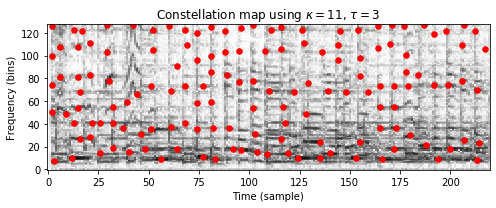

In [1]:
import os, sys
import numpy as np
from numba import jit
import librosa
#from scipy import signal
from scipy import ndimage
from matplotlib import pyplot as plt
import IPython.display as ipd
import time

sys.path.append('..')
import LibFMP.B
import LibFMP.C2
import LibFMP.C6

%matplotlib inline

@jit(nopython=True)
def compute_constellation_map_naive(Y, dist_freq=7, dist_time=7, thresh=0.01):
    """Compute constellation map (naive implementation)

    Notebook: C7/C7S1_AudioIdentification.ipynb

    Args:
        Y: Spectrogram (magnitude)
        dist_freq: Neighborhood parameter for frequency direction (kappa)
        dist_time: Neighborhood parameter for time direction (tau)
        thresh: Threshold parameter for minimal peak magnitude

    Returns:
        Cmap: Boolean mask for peak structure (same size as Y)
    """
    # spectrogram dimensions
    if Y.ndim > 1:
        (K, N) = Y.shape
    else:
        K = Y.shape[0]
        N = 1
    Cmap = np.zeros((K, N), dtype=np.bool8)

    # loop over spectrogram
    for k in range(K):
        f1 = max(k - dist_freq, 0)
        f2 = min(k + dist_freq + 1, K)
        for n in range(N):
            t1 = max(n - dist_time, 0)
            t2 = min(n + dist_time + 1, N)
            curr_mag = Y[k, n]
            curr_rect = Y[f1:f2, t1:t2]
            c_max = np.max(curr_rect)
            if ((curr_mag == c_max) and (curr_mag > thresh)):
                Cmap[k, n] = True
    return Cmap

def plot_constellation_map(Cmap, Y=None, xlim=None, ylim=None, title='',
                           xlabel='Time (sample)', ylabel='Frequency (bins)',
                           s=5, color='r', marker='o', figsize=(7, 3), dpi=72):
    """Plot constellation map

    Notebook: C7/C7/C7S1_AudioIdentification.ipynb

    Args:
        Cmap: Constellation map given as boolean mask for peak structure
        Y: Spectrogram representation
        xlim, ylim: Limits for x axis and yaxis
        title: Title for plot
        xlabel, ylabel: Label for x axis and y axis
        s: Size of dots in scatter plot
        color: Color used for scatter plot
        maker: Marke type used for scatter plot
        figsize: Width, height in inches
        dpi: Dots per inch
        colorbar: Create a colorbar.

    Returns:
        fig: The created matplotlib figure
        ax: The used axes.
        im: The image plot
    """
    if Cmap.ndim > 1:
        (K, N) = Cmap.shape
    else:
        K = Cmap.shape[0]
        N = 1
    if Y is None:
        Y = np.zeros((K, N))
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    im = ax.imshow(Y, origin='lower', aspect='auto', cmap='gray_r')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    Fs = 1
    if xlim is None:
        xlim = [-0.5/Fs, (N-0.5)/Fs]
    if ylim is None:
        ylim = [-0.5/Fs, (K-0.5)/Fs]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    n, k = np.argwhere(Cmap == 1).T
    ax.scatter(k, n, color=color, s=s, marker=marker)
    plt.tight_layout()
    return fig, ax, im
    
def compute_spectrogram(fn_wav, Fs=22050, N=2048, H=1024, bin_max=128, frame_max=None):
    x, Fs = librosa.load(fn_wav, Fs)
    x_duration = len(x) / Fs
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hanning')
    if bin_max is None:
        bin_max = X.shape[0]
    if frame_max is None:
        frame_max = X.shape[0]
    Y = np.abs(X[:bin_max, :frame_max])
    return Y

wav_dict = {}
wav_dict['Original'] = [os.path.join('..', 'data', 'C7', 'FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4.wav')]
wav_dict['Noise'] = [os.path.join('..', 'data', 'C7', 'FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_NoiseSNR-9.wav')]
wav_dict['Talking'] = [os.path.join('..', 'data', 'C7', 'FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_Talking.wav')]
wav_dict['Coding'] = [os.path.join('..', 'data', 'C7', 'FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_16kbits.wav')]
wav_dict['Faster'] = [os.path.join('..', 'data', 'C7', 'FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_Faster.wav')]
wav_dict['Higher'] = [os.path.join('..', 'data', 'C7', 'FMP_C7_Audio_Beatles_ActNaturally_63-3_73-4_Higher.wav')]


fn_wav = wav_dict['Original'][-1]
Y = compute_spectrogram(fn_wav)

dist_freq = 11  # kappa: neighborhood in frequency direction
dist_time = 3   # tau: neighborhood in time direction
title=r'Constellation map using $\kappa=%d$, $\tau=%d$' % (dist_freq, dist_time)
Cmap_naive = compute_constellation_map_naive(Y, dist_freq, dist_time)
fig, ax, im = plot_constellation_map(Cmap_naive, np.log(1 + 1 * Y), 
                                     color='r', s=30, title=title)

As an alternative to the naive, iterative implementation, we provide in the next code cell a much faster implementation using the Python package `scipy.ndimage` for multi-dimensional image processing. In the following code cell, we compare the results (which should be the same) and runtimes of the two implementation.

<!--Even though the naive implementation is accelerated using `numba`, the `scipy`-implementation is much faster.-->

Runtime of naive (iterative) implementation: 0.00535941 seconds
Runtime of fast (scipy.ndimage) implementation: 0.00066747 seconds


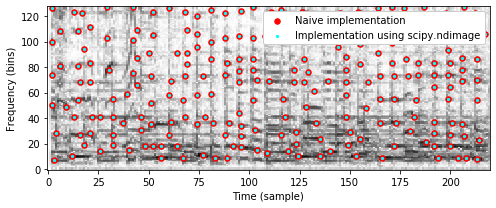

In [2]:
def compute_constellation_map(Y, dist_freq=7, dist_time=7, thresh=0.01):
    """Compute constellation map (implementation using image processing)

    Notebook: C7/C7S1_AudioIdentification.ipynb

        Y: Spectrogram (magnitude)
        dist_freq: Neighborhood parameter for frequency direction (kappa)
        dist_time: Neighborhood parameter for time direction (tau)
        thresh: Threshold parameter for minimal peak magnitude

    Returns:
        Cmap: Boolean mask for peak structure (same size as Y)
    """
    result = ndimage.maximum_filter(Y, size=[2*dist_freq+1, 2*dist_time+1], mode='constant')
    Cmap = np.logical_and(Y == result, result > thresh)
    return Cmap


dist_freq = 7  # kappa: neighborhood in frequency direction
dist_time = 3  # tau: neighborhood in time direction

start = time.time()
Cmap_naive = compute_constellation_map_naive(Y, dist_freq, dist_time)
end = time.time()
print('Runtime of naive (iterative) implementation: %.8f seconds' % (end - start))

start = time.time()
for i in range(100):
    Cmap = compute_constellation_map(Y, dist_freq, dist_time)
end = time.time()
print('Runtime of fast (scipy.ndimage) implementation: %.8f seconds' % ((end - start)/100))

fig, ax, im = plot_constellation_map(Cmap_naive, np.log(1 + 1 * Y), color='r', s=30)
n, k = np.argwhere(Cmap == 1).T
ax.scatter(k, n, color='cyan', s=5, marker='o')
plt.legend(['Naive implementation', 'Implementation using scipy.ndimage'], 
           loc='upper right', framealpha=1);

## Robustness of Constellation Maps

As described before, a fingerprinting system should be robust against background noise and signal distortions. In the following code cell, we show the constellation maps for the original Beatles example (`Original`), for the version superimposed with Gaussian noise (`Noise`), for the version with background noise (`Talking`), as well as for the version distorted by coding artifacts (`Coding`). Furthermore, we illustrate how the density of the constellation map can be controlled by the neighborhood parameters $\kappa$ and $\tau$. In both parameter settings, one can observe the following:

* The constellation maps of the distorted versions share some peaks with the original version.  
* The peaks of the distorted versions are sometimes slightly shifted in time and/or frequency compared with the ones of the original version.

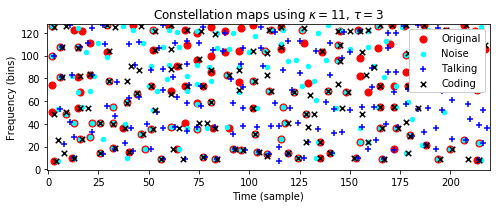

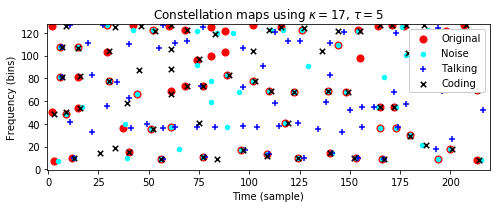

In [3]:
def compare_constellation_maps_Beatles(dist_freq = 11, dist_time = 3, wav_dict=wav_dict):
    fn_wav = wav_dict['Original'][-1]
    Y = compute_spectrogram(fn_wav)
    Cmap = compute_constellation_map(Y, dist_freq, dist_time)

    fn_wav = wav_dict['Noise'][-1]
    Y_noise = compute_spectrogram(fn_wav)
    Cmap_noise = compute_constellation_map(Y_noise, dist_freq, dist_time)

    fn_wav = wav_dict['Talking'][-1]
    Y_noise = compute_spectrogram(fn_wav)
    Cmap_talking = compute_constellation_map(Y_noise, dist_freq, dist_time)

    fn_wav = wav_dict['Coding'][-1]
    Y_coding = compute_spectrogram(fn_wav)
    Cmap_coding = compute_constellation_map(Y_coding, dist_freq, dist_time)

    title=r'Constellation maps using $\kappa=%d$, $\tau=%d$' % (dist_freq, dist_time)
    fig, ax, im = plot_constellation_map(Cmap, color='r', s=50,title=title)
    
    n, k = np.argwhere(Cmap_noise == 1).T
    ax.scatter(k, n, color='cyan', s=20, marker='o')
    
    n, k = np.argwhere(Cmap_talking == 1).T
    ax.scatter(k, n, color='blue', s=40, marker='+')

    n, k = np.argwhere(Cmap_coding == 1).T
    ax.scatter(k, n, color='k', s=30, marker='x')
    plt.legend(['Original', 'Noise', 'Talking', 'Coding'], loc='upper right', framealpha=1)
    return Cmap, Cmap_noise, Cmap_talking, Cmap_coding
    
compare_constellation_maps_Beatles(dist_freq = 11, dist_time = 3)
compare_constellation_maps_Beatles(dist_freq = 17, dist_time = 5);

## Evaluation Measures for Peak Matching

In practice, it turns out that even a small percentage of coinciding peaks (while allowing a small tolerance in time and frequency direction) is often sufficient to successfully identify a recording even in the presence of distortions. This observation is the basis for the matching procedure to be described below. We now introduce some **evaluation measures** that indicate the agreement between two constellation maps. We interpret the first constellation map as **reference** (its peaks being considered **relevant**) and the second one as **estimation** (its peaks being considered **estimated**). This allows us to use terms such as **true positives** (TP), **false positives** (FP), and **false negatives** (FN), which we introduced in the [FMP notebook on evaluation](../C4/C4S5_Evaluation.html) in the context of [music structure analysis](../C4/C4.html). In the following code cell, we implement a function for measuring TP, FP, and FN values, while allowing some **tolerance**. A similar concept was used in the context of [boundary evaluation](../C4/C4S5_Evaluation.html), see also Section 4.5.4 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>. We continue with our Beatles example considering the original, noise, coding, and talking versions.

====== Reference: Original; Estimation: Noise ======


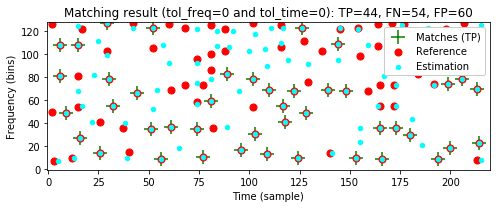

====== Reference: Original; Estimation: Noise ======


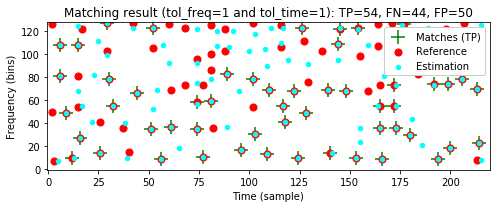

====== Reference: Original; Estimation: Coding ======


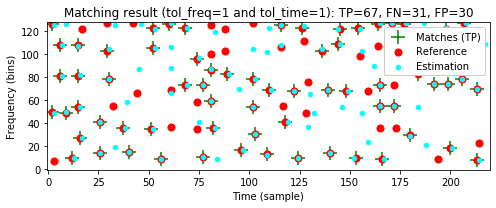

====== Reference: Original; Estimation: Talking ======


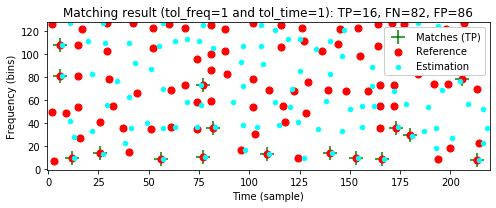

In [4]:
def match_binary_matrices_tol(C_ref, C_est, tol_freq=0, tol_time=0):
    """Compare binary matrices with tolerance
       Note: The tolerance parameters should be smaller than the minimum distance of
             peaks (1-entries in C_ref ad C_est) to obtain meaningful TP, FN, FP values

    Notebook: C7/C7S1_AudioIdentification.ipynb

        C_ref: Binary matrix used as reference
        C_est: inary matrix used as estimation
        tol_freq: Tolerance in frequency direction (vertical)
        tol_time: Tolerance in time direction (horizontal)

    Returns:
        TP: True positives
        FN: False negatives
        FP: False positives
        C_AND: Boolean mask of AND of C_ref and C_est (with tolerance)
    """
    assert C_ref.shape == C_est.shape, "Dimensions need to agree"
    N = np.sum(C_ref)
    M = np.sum(C_est)
    # Expand C_est with 2D-max-filter using the tolerance parameters
    C_est_max = ndimage.maximum_filter(C_est, size=(2*tol_freq+1, 2*tol_time+1),
                                       mode='constant')
    C_AND = np.logical_and(C_est_max, C_ref)
    TP = np.sum(C_AND)
    FN = N - TP
    FP = M - TP
    return TP, FN, FP, C_AND

def compare_constellation_maps(fn_wav_D, fn_wav_Q, dist_freq = 11, dist_time = 5, 
                               tol_freq = 1, tol_time = 1):
    Y_D = compute_spectrogram(fn_wav_D)
    Cmap_D = compute_constellation_map(Y_D, dist_freq, dist_time)
    Y_Q = compute_spectrogram(fn_wav_Q)
    Cmap_Q = compute_constellation_map(Y_Q, dist_freq, dist_time)

    TP, FN, FP, Cmap_AND = match_binary_matrices_tol(Cmap_D, Cmap_Q, 
                                                     tol_freq=tol_freq, tol_time=tol_time)
    title=r'Matching result (tol_freq=%d and tol_time=%d): TP=%d, FN=%d, FP=%d' % \
        (tol_freq,tol_time, TP, FN, FP)
    fig, ax, im = plot_constellation_map(Cmap_AND, color='green', s=200, marker='+', title=title)
    n, k = np.argwhere(Cmap_D == 1).T
    ax.scatter(k, n, color='r', s=50, marker='o')
    n, k = np.argwhere(Cmap_Q == 1).T
    ax.scatter(k, n, color='cyan', s=20, marker='o')
    plt.legend(['Matches (TP)', 'Reference', 'Estimation'], loc='upper right', framealpha=1)
    plt.tight_layout()
    plt.show()


fn_wav_D = wav_dict['Original'][-1]
fn_wav_Q = wav_dict['Noise'][-1]
tol_freq = 0
tol_time = 0
print('====== Reference: Original; Estimation: Noise ======')
compare_constellation_maps(fn_wav_D, fn_wav_Q, tol_freq=tol_freq, tol_time=tol_time)

tol_freq = 1
tol_time = 1
print('====== Reference: Original; Estimation: Noise ======')
compare_constellation_maps(fn_wav_D, fn_wav_Q, tol_freq=tol_freq, tol_time=tol_time)

fn_wav_Q = wav_dict['Coding'][-1]
tol_freq = 1
tol_time = 1
print('====== Reference: Original; Estimation: Coding ======')
compare_constellation_maps(fn_wav_D, fn_wav_Q, tol_freq=tol_freq, tol_time=tol_time)

fn_wav_Q = wav_dict['Talking'][-1]
tol_freq = 1
tol_time = 1
print('====== Reference: Original; Estimation: Talking ======')
compare_constellation_maps(fn_wav_D, fn_wav_Q, tol_freq=tol_freq, tol_time=tol_time)

## Matching Function
 
Let us consider a short query audio fragment, called $\mathcal{Q}$, as well as a database recording, called $\mathcal{D}$. Furthermore, let $\mathcal{C}(\mathcal{Q})$ and $\mathcal{C}(\mathcal{D})$ denote the constellation maps of $\mathcal{Q}$ and $\mathcal{D}$, respectively. In the case that the query $\mathcal{Q}$ is contained in the recording $\mathcal{D}$, the constellation map $\mathcal{C}(\mathcal{Q})$ should more or less agree with the corresponding section within the constellation map $\mathcal{C}(\mathcal{D})$. Intuitively, the basic idea of audio identification is to put the constellation map of $\mathcal{D}$ on a strip chart and the constellation map of $\mathcal{Q}$ on a transparent piece of plastic. The latter is then shifted over the former, and when the number of matching points is significant, the query is considered to be contained in the document. The proper time offset of the matching position within $\mathcal{C}(\mathcal{D})$ is given by the shift. 

We now formalize the outlined matching procedure. Recall that a peak position is specified by its coordinates $(n,k)$ consisting of a time stamp $n\in\mathbb{Z}$ and a frequency stamp $k\in[0:K]$. A constellation map is then a finite set of such coordinates. As before, let $\mathcal{C}(\mathcal{Q})\subset \mathbb{Z}\times[0:K]$ and $\mathcal{C}(\mathcal{D})\subset \mathbb{Z}\times[0:K]$ be the constellation maps of the query $\mathcal{Q}$ and the document $\mathcal{D}$, respectively. Shifting the query by $m\in\mathbb{Z}$ positions yields the constellation map $m+\mathcal{C}(\mathcal{Q})$ defined by

\begin{equation}
    m+\mathcal{C}(\mathcal{Q}) := \left\{(m+n,k) \mid (n,k)\in \mathcal{C}(\mathcal{Q}) \right\}.
\end{equation}

To count the matching peak coordinates between a shifted query and a database document, 
we simply need to intersect the corresponding constellation maps and to determine the size of the resulting set. This yields a matching function $\Delta_\mathcal{C}:\mathbb{Z}\to\mathbb{N}_0$ defined by 

\begin{equation}
    \Delta_\mathcal{C}(m):= \big| (m+\mathcal{C}(\mathcal{Q}))\cap  \mathcal{C}(\mathcal{D}) \big|
\end{equation}

for $m\in\mathbb{Z}$. In general, when the query and the database documents are unrelated,
the number $\Delta_\mathcal{C}(m)$ of (coincidentally) matching peak positions is usually small compared with $|\mathcal{C}(\mathcal{Q})|$. Only if the query is contained in the database document will the matching function have a large value $\Delta_\mathcal{C}(m)$ for some shift index $m\in\mathbb{Z}$. This index indicates the time offset between the query $\mathcal{Q}$ and the matching section in $\mathcal{D}$.

<!--
The following figure shows an example of a matching  function $\Delta_\mathcal{C}$, which assumes its maximum at the matching position corresponding to the time offset $t=4.5~\mathrm{sec}$. Even in the case of spurious and missing peaks due to signal degradations, the query may be correctly identified as long as the number of correctly matching peak coordinates is statistically significant.

<img src="../data/C7/FMP_C7_F05.png" width="600px" align="middle" alt="FMP_C7_F05.png">
-->

In the next code cell, we provide an implementation for a generalized matching function $\Delta_\mathcal{C}$ that also allows for small deviations (specified by tolerance parameters `tol_freq` and `tol_time`). As for the implementation, please note the following:

* When computing $\Delta_\mathcal{C}(m)$, the shifted query $m+\mathcal{C}(\mathcal{Q})$ is compared with $\mathcal{C}(\mathcal{D})$. This is equivalent to cutting out a section of $\mathcal{C}(\mathcal{D})$  starting at position $m$ with the same length as the query and to compare this section with $\mathcal{C}(\mathcal{Q})$.

* When comparing the constellation maps of $\mathcal{Q}$ and $\mathcal{D}$, we are interested in the number of matching peaks. This corresponds to the number of true positives (TP), when regarding $\mathcal{D}$ as reference and $\mathcal{Q}$ as estimation.

* In the comparison, we use the function `match_binary_matrices_tol`, which has the two tolerance parameters `tol_freq` and `tol_time`. Setting these parameters to the value $0$ yields the matching function $\Delta_\mathcal{C}$ as introduced above.

We continue with our Beatles example using `Original` as $\mathcal{D}$ and the segment $[100:149]$ (given in samples) of `Noise` as $\mathcal{Q}$. The following figure shows matching functions for different tolerance parameters. Note that these functions assume their maximum at the shift position $m=100$.

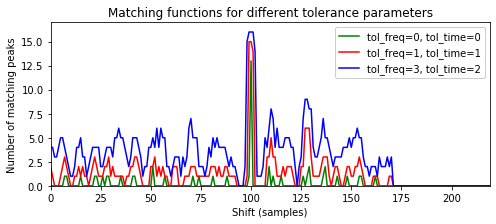

In [5]:
def compute_matching_function(C_D, C_Q, tol_freq=1, tol_time=1):
    """Computes matching function for constellation maps

    Notebook: C7/C7S1_AudioIdentification.ipynb

        C_D: Binary matrix used as dababase document
        C_Q: Binary matrix used as query document
        tol_freq: Tolerance in frequency direction (vertical)
        tol_time: Tolerance in time direction (horizontal)

    Returns:
        Delta: Matching function
        shift_max: Optimal shift position maximizing Delta
    """
    L = C_D.shape[1]
    N = C_Q.shape[1]
    M = L - N
    assert M >= 0, "Query must be shorter than document"
    Delta = np.zeros(L)
    for m in range(M + 1):
        C_D_crop = C_D[:, m:m+N]
        TP, FN, FP, C_AND = match_binary_matrices_tol(C_D_crop, C_Q,
                                                      tol_freq=tol_freq, tol_time=tol_time)
        Delta[m] = TP
        shift_max = np.argmax(Delta)
    return Delta, shift_max


dist_freq = 11
dist_time = 5

fn_wav_D = wav_dict['Original'][-1]
Y_D = compute_spectrogram(fn_wav_D)
Cmap_D = compute_constellation_map(Y_D, dist_freq, dist_time)

fn_wav_Q = wav_dict['Noise'][-1]
Y_Q = compute_spectrogram(fn_wav_Q)
Y_Q = Y_Q[:, 100:150]
Cmap_Q = compute_constellation_map(Y_Q, dist_freq, dist_time)

Delta_0, shift_max_0 = compute_matching_function(Cmap_D, Cmap_Q, tol_freq=0, tol_time=0)
Delta_1, shift_max_1 = compute_matching_function(Cmap_D, Cmap_Q, tol_freq=1, tol_time=1)
Delta_2, shift_max_2 = compute_matching_function(Cmap_D, Cmap_Q, tol_freq=3, tol_time=2)

y_max = Delta_2[shift_max_2] + 1
fig, ax, line = LibFMP.B.plot_signal(Delta_0, ylim=[0, y_max], color='g',
                                     xlabel='Shift (samples)', ylabel='Number of matching peaks', 
                                     figsize=(7, 3))
plt.title('Matching functions for different tolerance parameters')
ax.plot(Delta_1, color='r')
ax.plot(Delta_2, color='b')
plt.legend(['tol_freq=0, tol_time=0', 'tol_freq=1, tol_time=1', 
            'tol_freq=3, tol_time=2'], loc='upper right', framealpha=1)
plt.show()

In the next code cell, we show the local matching result between the shifted query $m+\mathcal{C}(\mathcal{Q})$ and $\mathcal{C}(\mathcal{D})$ for different shift indices $m$. Note there are hardly any matching peaks for $m=0$, while there are many matching peaks for the optimal shift index $m=99$. 

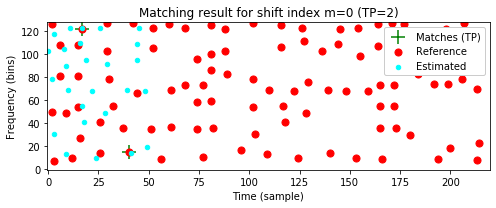

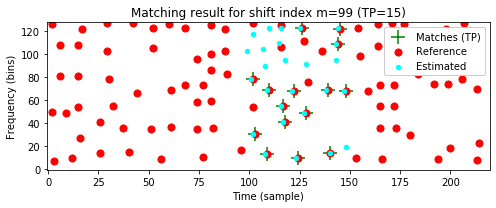

In [6]:
def plot_shifted_Cmap(Cmap_D, Cmap_Q, shift=0):
    Cmap_Q_extend = np.zeros(Cmap_D.shape) 
    Cmap_Q_extend[:, shift:shift+Cmap_Q.shape[1]] = Cmap_Q
    TP, FN, FP, Cmap_AND = match_binary_matrices_tol(Cmap_D, Cmap_Q_extend, 
                                                     tol_freq=1, tol_time=1)
    title=r'Matching result for shift index m=%d (TP=%d)' % (shift, TP)
    fig, ax, im = plot_constellation_map(Cmap_AND, color='green', s=200, marker='+', title=title)
    n, k = np.argwhere(Cmap_D == 1).T
    ax.scatter(k, n, color='r', s=50, marker='o')
    n, k = np.argwhere(Cmap_Q_extend == 1).T
    ax.scatter(k, n, color='cyan', s=20, marker='o')
    plt.legend(['Matches (TP)', 'Reference', 'Estimated'], loc='upper right', framealpha=1)
    plt.show()
    
plot_shifted_Cmap(Cmap_D, Cmap_Q, shift=0)    
plot_shifted_Cmap(Cmap_D, Cmap_Q, shift=shift_max_1) 

## Matching Functions for Beatles Examples 

We now have a look at the matching functions obtained from different versions of the Beatles example. As before, we use `Original` as $\mathcal{D}$ and the segment $[100:149]$ (given in samples) of other versions as $\mathcal{Q}$. The following figure shows matching functions for the queries `Original`, `Noise`, `Coding`, and `Talking`. While one can observe a distinct maximum in the matching function at the expected matching positions for the first three queries, the `Talking` query is much harder to identify.

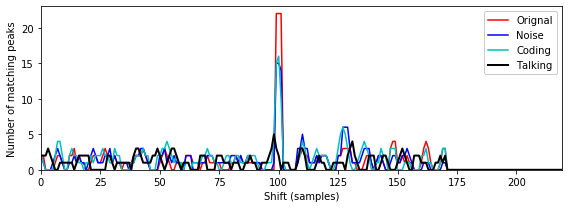

In [7]:
def compute_Delta(fn_wav_D, fn_wav_Q, seg_start=100, seg_end=150, dist_freq=11, 
                  dist_time=5, tol_freq=1, tol_time=1):
    Y_D = compute_spectrogram(fn_wav_D)
    Cmap_D = compute_constellation_map(Y_D, dist_freq=dist_freq, dist_time=dist_time)
    Y_Q = compute_spectrogram(fn_wav_Q)
    Y_Q = Y_Q[:, seg_start:seg_end]
    Cmap_Q = compute_constellation_map(Y_Q, dist_freq=dist_freq, dist_time=dist_time)
    Delta, shift_max = compute_matching_function(Cmap_D, Cmap_Q, 
                                                 tol_freq=tol_freq, tol_time=tol_time)
    return Delta, shift_max

fn_wav_Q = wav_dict['Original'][-1]    
Delta_0, shift_max_0 = compute_Delta(fn_wav_D, fn_wav_Q)
fn_wav_Q = wav_dict['Noise'][-1]
Delta_1, shift_max_1 = compute_Delta(fn_wav_D, fn_wav_Q)
fn_wav_Q = wav_dict['Coding'][-1]
Delta_2, shift_max_2 = compute_Delta(fn_wav_D, fn_wav_Q)
fn_wav_Q = wav_dict['Talking'][-1]
Delta_3, shift_max_3 = compute_Delta(fn_wav_D, fn_wav_Q)

y_max = Delta_0[shift_max_0] + 1
fig, ax, line = LibFMP.B.plot_signal(Delta_0, ylim=[0, y_max], color='r',
                                     xlabel='Shift (samples)', 
                                     ylabel='Number of matching peaks', 
                                     figsize=(8, 3))
ax.plot(Delta_1, color='b')
ax.plot(Delta_2, color='c')
ax.plot(Delta_3, color='k', linewidth='2')
plt.legend(['Orignal', 'Noise', 'Coding', 'Talking'], loc='upper right', framealpha=1)
plt.show()

In the previous example, we have seen that correct segment in the `Original` Beatles song can hardly be identified when using the segment $[100:149]$ (given in samples) of the `Talking` version. One way to increase the **discriminative power** of the query constellation map is to increase its duration (see also the discussion of specificity and granularity in the [FMP notebook on content-based audio retrieval](../C7/C7_ContentBasedAudioRetrieval.html)). To demonstrate this, we show in the subsequent figure the matching functions for queries of different lengths:

* Segment $[100:149]$ (corresponding to 2.32 seconds)
* Segment $[100:174]$ (corresponding to 3.48 seconds)
* Segment $[100:199]$ (corresponding to 4.64 seconds)

In the case of the longest query, the peak structure becomes more prominent even in the case of the strongly distorted `Talking` version.

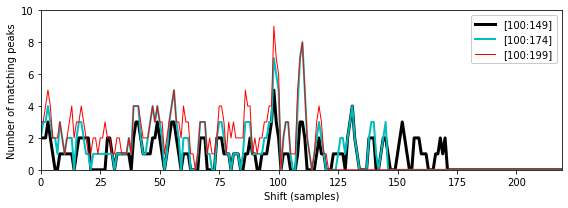

In [8]:
fn_wav_Q = wav_dict['Talking'][-1]
Delta_0, shift_max_0 = compute_Delta(fn_wav_D, fn_wav_Q)
Delta_1, shift_max_1 = compute_Delta(fn_wav_D, fn_wav_Q, seg_start=100, seg_end=175)
Delta_2, shift_max_2 = compute_Delta(fn_wav_D, fn_wav_Q, seg_start=100, seg_end=200)

y_max = Delta_2[shift_max_2] + 1
fig, ax, line = LibFMP.B.plot_signal(Delta_0, ylim=[0, y_max], color='k',
                                     xlabel='Shift (samples)', 
                                     ylabel='Number of matching peaks', 
                                     figsize=(8, 3), linewidth=3)
ax.plot(Delta_1, color='c', linewidth=2)
ax.plot(Delta_2, color='r', linewidth=1)
plt.legend(['[100:149]', '[100:174]', '[100:199]'], loc='upper right', framealpha=1)
plt.show()

We close our discussion on the matching functions by considering the two versions `Faster` (time-scale modified version played about 10 percent faster) and `Higher` (pitch-shifted version). Again using `Original` as $\mathcal{D}$ and the segment $[100:174]$ of other versions as $\mathcal{Q}$, the subsequent figure shows the resulting matching functions. As defined above, a matching function compares constellation maps in a rather strict sense: systematic shifts in frequency and global time stretches are not accounted for. As a result, versions such as `Faster` or `Higher` cannot be identified by the techniques discussed so far.

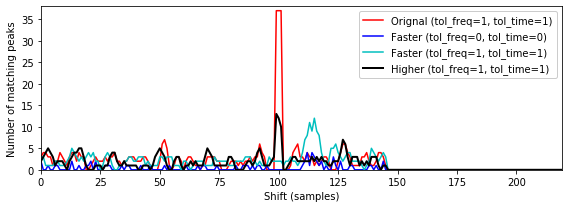

In [9]:
fn_wav_Q = wav_dict['Original'][-1]    
Delta_0, shift_max_0 = compute_Delta(fn_wav_D, fn_wav_Q, 
                                     seg_start=100, seg_end=175, tol_freq=1, tol_time=1)
fn_wav_Q = wav_dict['Faster'][-1]
Delta_1, shift_max_1 = compute_Delta(fn_wav_D, fn_wav_Q, 
                                     seg_start=100, seg_end=175, tol_freq=0, tol_time=0)
Delta_2, shift_max_1 = compute_Delta(fn_wav_D, fn_wav_Q, 
                                     seg_start=100, seg_end=175, tol_freq=1, tol_time=1)
fn_wav_Q = wav_dict['Higher'][-1]
Delta_3, shift_max_2 = compute_Delta(fn_wav_D, fn_wav_Q, 
                                     seg_start=100, seg_end=175, tol_freq=1, tol_time=1)

y_max = Delta_0[shift_max_0] + 1
fig, ax, line = LibFMP.B.plot_signal(Delta_0, ylim=[0, y_max], color='r',
                                     xlabel='Shift (samples)', 
                                     ylabel='Number of matching peaks', 
                                     figsize=(8, 3))
ax.plot(Delta_1, color='b')
ax.plot(Delta_2, color='c')
ax.plot(Delta_3, color='k', linewidth='2')
plt.legend([r'Orignal (tol_freq=1, tol_time=1)', r'Faster (tol_freq=0, tol_time=0)', 
            r'Faster (tol_freq=1, tol_time=1)', r'Higher (tol_freq=1, tol_time=1)'], loc='upper right', framealpha=1)
plt.show()

## Indexing

In the matching processes described so far, the query needs to be compared against all sections (having the same duration as the query) of all documents contained in the database. Obviously, such an exhaustive search strategy, whose run-time linearly depends on the number and sizes of the documents, is not feasible for large databases containing millions of recordings. In view of scalability, one requires search strategies that facilitate fast information access without sacrificing the accuracy of the retrieval results. Such search strategies typically use **indexing** techniques, which optimize speed and performance by cutting down the search space through suitable look-up operations. An **index** is constructed similarly to a traditional book index, which consists of a collection of alphabetically ordered **key words** (generally referred to as **hashes**). For each key word, in turn, there is a list of increasing page numbers indicating the occurrences of the given key word in the book. In our fingerprinting context, the key words (or hashes) are (suitably quantized) frequency values of peaks (or combinations thereof), whereas the page numbers correspond to time positions and document identifiers. We do not further describe the indexing steps, which is a crucial element in audio identification system. For details, we refer to Section 7.1.3 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>.

## Peak Pairs

Even though being robust to noise and distortions, individual spectral peaks have a [low specificity](../C7/C7_ContentBasedAudioRetrieval.html) in the sense that they are not very characteristic when considered in an isolated fashion. As a result, when using individual spectral peaks and their frequency stamps as hash values, it turns out that the resulting hash lists ("the list of page numbers") are long and the indexing becomes slow. Therefore, one crucial step in the fingerprinting system as introduced by Wang is to increase the specificity and the number of hashes (thus reducing the length of the resulting hash lists) without sacrificing the robustness of the fingerprints. The main idea is to form fingerprint hashes by considering pairs of peaks instead of individual ones. To this end, one fixes a point $(n_0,k_0)\in\mathcal{C}(\mathcal{D})$ to serve as an **anchor point** as well as a **target zone** $T_{(n_0,k_0)}\subset\mathbb{Z}\times[0:K]$ associated to it. The target zone should be thought of as a small rectangular region in the time&ndash;frequency plane close to the anchor point. Then one considers pairs of points 

\begin{equation}
    \big((n_0,k_0),(n_1,k_1)\big)
\end{equation}

consisting of the anchor point $(n_0,k_0)$ and some target  point $(n_1,k_1)\in T_{(n_0,k_0)}\cap\mathcal{C}(\mathcal{D})$. Each pair yields a triple

\begin{equation}
    (k_0,k_1,n_1-n_0)
\end{equation}

consisting of two frequency stamps and a difference of two time stamps. The idea is to use these triples as hashes instead of single frequency stamps. 

<img src="../data/C7/FMP_C7_F07.png" width="500px" align="middle" alt="FMP_C7_F07.png">

At the matching stage, one now counts matching triples between the shifted query and the database document instead of considering only matching frequency stamps. One can show that, even though the number of data items to be indexed increases (by considering triples instead of single frequency stamps), one gains a tremendous acceleration in the search process thanks to the much higher specificity of the triples. For further details, we refer to the original article <a href="https://www.ee.columbia.edu/~dpwe/papers/Wang03-shazam.pdf">An Industrial Strength Audio Search Algorithm.</a> by Wang.


# Further Notes

In recent years, many different fingerprinting and indexing techniques have been proposed and are now being used in commercial products. In this notebook, we had a closer look at one of these techniques, which was originally developed for the [Shazam audio identification system](https://www.shazam.com/). We discussed the main ideas underlying this system, but there are many parameters that need to be adjusted in order to find a good trade-off between the various requirements including robustness, specificity, scalability, and compactness. Important aspects include 

* the STFT parameters (window length, hop size) that determine the temporal and spectral resolutions, 
* the peak-picking strategy (with its neighborhood parameters), 
* the size of the target zones (used to define the triplets), and 
* suitable data structures for hashing.

Although robust to many kinds of signal distortions, the discussed fingerprinting approach is not designed for handling temporal deformations. The matching of the constellation maps as well as the time stamp differences in the peak pairs are both sensitive to relative tempo differences between the query and database document. Therefore, one needs other techniques to become invariant to time scale modifications.

The fingerprints using spectral peaks are designed to be highly sensitive to a particular version of a piece of music. For example, given a multitude of different performances of a song by the same artist, the fingerprinting system is likely to pick the correct one even if they are virtually indistinguishable by the human ear. In general, audio identification systems are designed to target identification of recordings that are already present in the database. Therefore, such techniques usually do not generalize to live recordings or performances that are not part of the database. In the following notebooks, we discuss retrieval tasks and techniques that aim at identifying different versions of a given recording including different performances of the same piece, arrangements, and cover songs.

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and <a href="https://www.audiolabs-erlangen.de/fau/assistant/lopez">Patricio López-Serrano</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>